## CIFAR 10

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
PATH = "data/cifar10/"
os.makedirs(PATH,exist_ok=True)

In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

In [4]:
def get_data(sz,bs):
    tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomFlip()], pad=sz//8)
    return ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

In [5]:
bs=128

### Look at data

In [6]:
data = get_data(32,4)

In [7]:
x,y=next(iter(data.trn_dl))

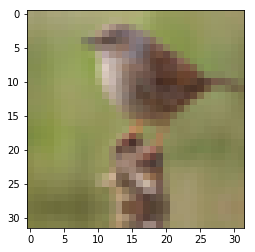

In [8]:
plt.imshow(data.trn_ds.denorm(x)[0]);

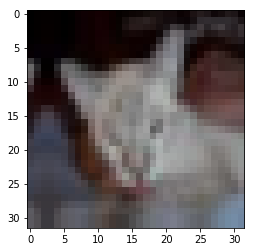

In [9]:
plt.imshow(data.trn_ds.denorm(x)[1]);

## Initial model

In [10]:
from fastai.models.cifar10.resnext import resnext29_8_64

m = resnext29_8_64()
bm = BasicModel(m.cuda(), name='cifar10_rn29_8_64')

/home/gezi/py3env/lib/python3.6/site-packages/fastai-0.7.0-py3.6.egg/fastai/models/cifar10/resnext.py:73: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(m.weight)


In [11]:
data = get_data(8,bs*4)

In [12]:
learn = ConvLearner(data, bm)
learn.unfreeze()

In [13]:
lr=1e-2; wd=5e-4

In [ ]:
lrf = learn.lr_find()

In [ ]:
print(lrf)

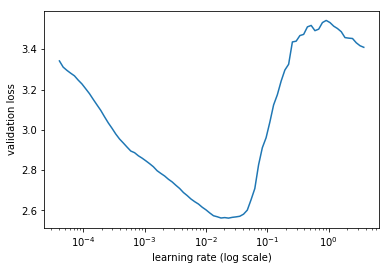

In [16]:
learn.sched.plot()

In [17]:
%time learn.fit(lr, 1)

 35%|███▍      | 34/98 [00:14<00:27,  2.33it/s, loss=2.23]

KeyboardInterrupt: 

In [18]:
learn.fit(lr, 2, cycle_len=1)

  9%|▉         | 9/98 [00:04<00:44,  2.01it/s, loss=2.18]
epoch      trn_loss   val_loss   accuracy                 
    0      1.660695   1.51586    0.4534    
    1      1.511793   1.423011   0.4882                   



[1.4230109336853027, 0.488200000667572]

In [19]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

epoch      trn_loss   val_loss   accuracy                 
    0      1.417075   1.3854     0.5045    
    1      1.396977   1.360235   0.5086                   
    2      1.262032   1.29839    0.5347                   
    3      1.323917   1.434224   0.4868                   
    4      1.226122   1.269455   0.5412                   
    5      1.106373   1.196596   0.5697                   
    6      1.019568   1.186597   0.5787                   



[1.186597248840332, 0.5787000005722046]

In [20]:
learn.save('8x8_8')

## 16x16

In [21]:
learn.load('8x8_8')

In [22]:
learn.set_data(get_data(16,bs*2))

In [23]:
%time learn.fit(1e-3, 1, wds=wd)

epoch      trn_loss   val_loss   accuracy                   
    0      1.517224   1.479416   0.4629    

CPU times: user 25.1 s, sys: 22.8 s, total: 47.9 s
Wall time: 26.3 s


[1.4794159097671509, 0.4629]

In [24]:
learn.unfreeze()

In [25]:
learn.lr_find()

epoch      trn_loss   val_loss   accuracy                   
    0      2.708425   20773964.1056 0.1       



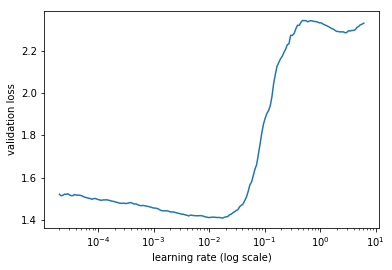

In [26]:
learn.sched.plot()

In [27]:
lr=1e-2

In [28]:
learn.fit(lr, 2, cycle_len=1, wds=wd)

epoch      trn_loss   val_loss   accuracy                   
    0      1.170261   1.077664   0.6091    
    1      1.030724   0.958806   0.6595                     



[0.9588064260005951, 0.6595]

In [29]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

epoch      trn_loss   val_loss   accuracy                    
    0      0.940711   0.886267   0.6889    
    1      0.942904   0.877985   0.6915                      
    2      0.751138   0.768557   0.7296                      
    3      0.85915    0.939773   0.6852                      
    4      0.716295   0.789837   0.73                        
    5      0.606361   0.663592   0.7682                      
    6      0.53345    0.642123   0.7743                      



[0.6421226511478424, 0.7743]

In [30]:
learn.save('16x16_8')

## 24x24

In [31]:
learn.load('16x16_8')

In [32]:
learn.set_data(get_data(24,bs))

In [33]:
learn.fit(1e-2, 1, wds=wd)

epoch      trn_loss   val_loss   accuracy                    
    0      0.675646   0.783434   0.7319    



[0.7834340079784393, 0.7319]

In [34]:
learn.unfreeze()

In [35]:
learn.fit(lr, 1, cycle_len=1, wds=wd)

epoch      trn_loss   val_loss   accuracy                    
    0      0.635211   0.606865   0.7913    



[0.6068654565572739, 0.7913]

In [36]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

epoch      trn_loss   val_loss   accuracy                    
    0      0.5435     0.531886   0.8182    
    1      0.561118   0.569581   0.8091                      
    2      0.406358   0.45027    0.849                       
    3      0.530289   0.766036   0.7569                      
    4      0.427189   0.509906   0.8334                      
    5      0.30009    0.384696   0.8727                      
    6      0.240064   0.373127   0.8749                      



[0.3731268438577652, 0.8749]

In [37]:
learn.save('24x24_8')

In [38]:
log_preds,y = learn.TTA()
#preds = np.mean(np.exp(log_preds),0), metrics.log_loss(y,preds), accuracy_np(preds,y)

## 32x32

In [39]:
learn.load('24x24_8')

In [40]:
learn.set_data(get_data(32,bs))

In [41]:
learn.fit(1e-2, 1, wds=wd)

epoch      trn_loss   val_loss   accuracy                    
    0      0.31825    0.38657    0.8673    



[0.3865702114582062, 0.8673]

In [42]:
learn.unfreeze()

In [43]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

  0%|          | 0/391 [00:00<?, ?it/s]


RuntimeError: cuda runtime error (2) : out of memory at /pytorch/aten/src/THC/generic/THCStorage.cu:58

In [ ]:
learn.fit(lr, 3, cycle_len=4, wds=wd)

In [ ]:
log_preds,y = learn.TTA()
metrics.log_loss(y,np.exp(log_preds)), accuracy_np(log_preds,y)

In [ ]:
learn.save('32x32_8')